# Homework 2: Complete exercises by solving simple data problems (2 weeks)

* Read tasks and write your solutions into cells with the `# Exercise solution` comment in them.
* The notebook should run from start to end without any stops (exceptions).
* Remove all unnecesary code (drafts etc.) before submitting. Keep your final solution in a single corresponding cell for each task.

## Exercise 1: basic syntax
(1 point)

**TASK:**

Examine in the cell below. Unmodified, this cell with raise an error. Modify the indicated row so that the cell would return the expected result.

In [39]:
import math

# Exercise solution

fibonacci_numbers_sum = 1 + 1 + 2 + 3 + 5 + 8
print(fibonacci_numbers_sum)

20


## Exercise 2: list slicing

(1 point)

**TASK:**

The Fibonacci sequence is the series of numbers where each number is the sum of the two preceding numbers. It starts from two numbers, 0 and 1; the third number would be 0+1=1, then 1+1=2, then 1+2=3, 5, 8, etc.

You have a list containing Fibonacci numbers up to 100000. **Using slicing**, calculate the sum of numbers found between 610 and 46368 (these two numbers included).

In [40]:
fibonacci_100000 = [ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377,
                     610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657,
                     46368, 75025 ]

In [41]:
# Exercise solution

# Make sure the list is ordered
fibonacci_100000.sort()

# Calculate the sum between 610 and 46368 inclusive
sum(fibonacci_100000[ fibonacci_100000.index(610):(fibonacci_100000.index(46368) + 1) ])

120406

## Exercise 3: adding parameters to functions
(2 points)

**TASK:**

Below is a simple function which replaces all "@" symbols with a space, so email addresses in a given text would be less detectable. It may be useful against certain web scrapers which search for email addresses on internet.

A colleague suggested that the same function can be used to remove annoying hashtags ("#") from some online texts. It may also be useful to remove other symbols.

You need to modify the function so it would have two parameters: the `text` parameter should stay unchanged, and a second parameter should provide the symbol to remove from strings. Use informative name for this new parameter.

In [42]:
# Exercise solution

def processed_text(text: str, remove_char: str = '@') -> str:
    processed = text.replace(remove_char, ' ')
    return processed

In [43]:
# Run this cell to test your solution. Do not change anything! It should not raise any errors.

text = "Fresh #data about rare tropical #snails! Contact snaildata@snail.com"

assert processed_text(text, '@') == "Fresh #data about rare tropical #snails! Contact snaildata snail.com"
assert processed_text(text, '#') == "Fresh  data about rare tropical  snails! Contact snaildata@snail.com"
assert processed_text(text, 's') == "Fre h #data about rare tropical # nail ! Contact  naildata@ nail.com"

## Exercise 4: extracting a code block into a function

(2 points)

**TASK:**

Below is a working code to calculate RMSD. It would be more convenient to have it as a function.
- Move code into a function and name it `calculate_rmsd`. The function should have 2 parameters.
- Make the function return calculated values instead of printing them.

In [44]:
values_0 = [ 0.1, 1.2, 4.1, 7.7, 2.0, 8.2, 3.4 ]
values_1 = [ 9.1, 1.2, 4.4, 7.6, 2.1, 8.8, 6.7 ]

assert (len(values_0) > 0) and (
            len(values_0) == len(values_1)), 'List of values should be non-empty and have equal length'
differences = [ abs(x0 - x1) for x0, x1 in zip(values_0, values_1) ]
differences_squared = [ diff ** 2 for diff in differences ]
sum_squared_differences = sum(differences_squared)
answer = sum_squared_differences / len(values_0)
round_answer = round(answer, 2)
print(round_answer)

13.19


In [45]:
# Exercise solution

def calculate_rmsd(values_0: list, values_1: list) -> float:
    assert (len(values_0) > 0) and (len(values_0) == len(values_1)),\
        'List of values should be non-empty and have equal length'

    differences = [ abs(x0 - x1) for x0, x1 in zip(values_0, values_1) ]
    differences_squared = [ diff ** 2 for diff in differences ]
    sum_squared_differences = sum(differences_squared)
    answer = sum_squared_differences / len(values_0)
    return round(answer, 2)

In [46]:
# Run this cell to test your solution. Do not change anything! It should not raise any errors.

assert calculate_rmsd([ 1, 2, 3, 4 ], [ 1, 2, 3, 4 ]) == 0
assert calculate_rmsd([ 1, 2, 3, 4 ], [ 5, 6, 7, 8 ]) == 16

values_0 = [ 0.1, 1.2, 4.1, 7.7, 2.0, 8.2, 3.4 ]
values_1 = [ 9.1, 1.2, 4.4, 7.6, 2.1, 8.8, 6.7 ]
assert calculate_rmsd(values_0, values_1) == 13.19

## Exercise 5: open your dataset

(4 points)

**TASK:**

1. Load your dataset into this Jupyter notebook. If you need, you can import relevant packages.

  - If you need help with this task, read `open_files_in_python.html`, which is a notebook containing information on how to open files.
  - If there are several files (e.g. several recordings done), it is enough to load only one of them. However, if your data has labels or other information stored in a separate files, you need to load them as well.

2. Print out the size of your dataset. You may need commands such as `len()` or `.shape()`.

Data available locally
Reading the data
Dataset size: (258, 134788)
The first row of the matrix contains the timestamps: [0.         0.00166667 0.00333333 0.005      0.00666667]
The last row of the matrix contains the finger movement events: {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


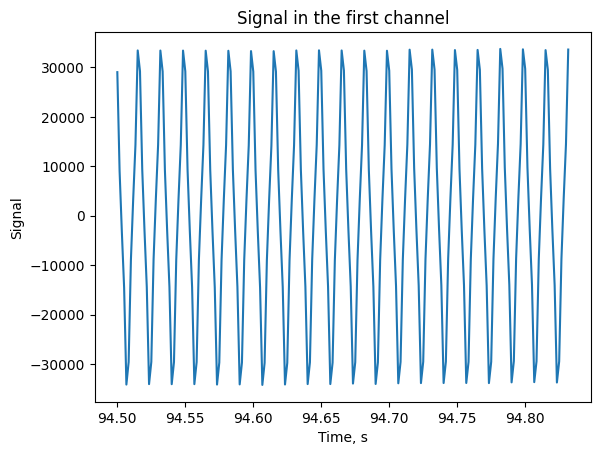

In [48]:
# Exercise solution

# First, we will download the data from the server.
# Note that it may take some time. File size is 265 MB.

from os.path import exists
import requests
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

data_file = 'S1_run10.mat'

if not exists(data_file):
    print('Will download the file')
    request = requests.get('https://osf.io/download/635d3f7d40db72007754ef81', allow_redirects = True)
    open(data_file, 'wb').write(request.content)
    print('Download successful')
else:
    print('Data available locally')


# Read the MATLAB file and select the y object
print('Reading the data')
data = scipy.io.loadmat(data_file)['y']

print(f'Dataset size: {data.shape}')
print(f'The first row of the matrix contains the timestamps: {data[0][:5]}')
print(f'The last row of the matrix contains the finger movement events: {set(data[-1])}')

start = np.where(data[-1] == 5)[0][0]
end = start + 200

_, ax = plt.subplots()
ax.plot(data[0][start:end], data[1][start:end])
ax.set(xlabel = 'Time, s', ylabel = 'Signal', title = 'Signal in the first channel')
plt.show()